<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 25</b>: Aprendizaje no supervisado</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. ¬øAprendizaje no supervisado?](#nosupervisado)
  - [1.1. Aplicaciones](#aplicaciones)
  - [1.2. Desaf√≠os](#desafios)
- [2. Clustering](#clustering)
  - [2.1. KMeans](#kmeans)
  - [2.2. Jer√°rquico](#jerarquico)
  - [2.3. DBScan](#dbscan)
- [3. M√©tricas para clustering](#metricas)
  - [3.1. M√©todo del codo](#elbow)
  - [3.2. Indice silueta](#silhouette)
- [4. Reducci√≥n de dimensionalidad](#dimensionalidad)
  - [4.1. An√°lisis de Componentes Principales](#pca)
- [5. Links de inter√©s](#links)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings

In [ ]:
warnings.filterwarnings("ignore")

## 1. ¬øAprendizaje no supervisado? <a name="nosupervisado"></a>

<img src="https://drive.google.com/uc?export=view&id=19zYfuob5MTjbURFYFkYlM8CSg8RD4CVq" height="232" width="526" style="float: center;">

El aprendizaje no supervisado (unsupervised learning) es un tipo de aprendizaje autom√°tico en el que el modelo se entrena usando datos que no est√°n etiquetados.

El objetivo principal del aprendizaje no supervisado es explorar la estructura inherente de los datos y extraer informaci√≥n valiosa sin ninguna gu√≠a expl√≠cita sobre qu√© buscar (supervizaci√≥n).

Hay dos tipos principales de t√©cnicas de aprendizaje no supervisado:

- **Agrupamiento** (o clusterizaci√≥n): consiste en dividir el conjunto de datos en grupos (clusters) basados en similitudes o patrones en los datos.

- **Reducci√≥n de dimensionalidad** (dimensionality reduction): El objetivo es reducir la cantidad de caracter√≠sticas en el conjunto de datos sin perder informaci√≥n importante.

  Estas t√©cnicas permiten representar los datos en un espacio de menor dimensi√≥n, facilitando la visualizaci√≥n y comprensi√≥n de la estructura de los datos.

### 1.1. Aplicaciones <a name="aplicaciones"></a>

- Agrupamiento de clientes: Identificar segmentos de clientes con comportamientos similares para estrategias de marketing.

- Detecci√≥n de anomal√≠as: Identificar datos at√≠picos o inusuales que no se ajustan a los patrones generales.

- Recomendaci√≥n de productos: Sugerir productos basados en similitudes entre diferentes usuarios o √≠tems.

### 1.2. Desaf√≠os <a name="desafios"></a>

- Interpretaci√≥n de los resultados puede ser dif√≠cil, ya que no hay una referencia clara de lo que es correcto.

  Evaluar modelos de aprendizaje no supervisado puede ser un desaf√≠o, ya que no tenemos etiquetas o resultados conocidos para comparar directamente.

- Elecci√≥n de hiperpar√°metros: La selecci√≥n de la cantidad de clusters o componentes principales es generalmente subjetiva.

## 2. Clustering <a name="clustering"></a>

<img src="https://drive.google.com/uc?export=view&id=1QESDKSP80wD90ZaSrkacAI_foU-5lvtw" height="211" width="457" style="float: center;">

El clustering es una t√©cnica del aprendizaje no supervisado que se utiliza para dividir un conjunto de datos en grupos basados en similitudes entre las observaciones.

El objetivo es agrupar elementos similares en un mismo cluster y separar observaciones diferentes en clusters distintos.

Este proceso ayuda a descubrir estructuras y patrones ocultos en los datos, que a simple vista no podemos determinar.

Existen varios algoritmos de clustering, pero los m√°s comunes son: kMeans, clustering jer√°rquico o DBSCAN.

**Aplicaciones**:
- Segmentaci√≥n de clientes en marketing.
- An√°lisis de redes sociales (generaci√≥n de comunidades).
- An√°lisis de datos biol√≥gicos como interacci√≥n entre genes.


<img src="https://drive.google.com/uc?export=view&id=1gXQ3kLPeW0L2MMPMH4Ae5xuxV-FD49XO" height="262" width="358" style="float: center;">

### Terminolog√≠a

- Cluster: Un grupo de datos que son similares entre s√≠.

- Centroide: El punto medio de un cluster, que se utiliza para definir la posici√≥n del cluster.

- Distancia: Medida de similitud entre dos puntos de datos. Las m√©tricas de distancia comunes incluyen la distancia euclidiana, Manhattan y Coseno.

### 2.1. K-Means <a name="kmeans"></a>

Es uno de los algoritmos de clustering m√°s populares.

Tiene como objetivo dividir un conjunto de datos en ***K*** cl√∫steres (hiperpar√°metro), de manera que los puntos dentro de cada cl√∫ster sean similares entre s√≠ y diferentes a los puntos en otros cl√∫steres.

El reto de encontrar el K √≥ptimo.

Este algoritmo es r√°pido y efectivo para el agrupamiento de datos, pero depende mucho del reparto inicial de centroides y no siempre encuentra la mejor soluci√≥n global.

### Algoritmo

1. **Inicializaci√≥n**: Toma k puntos al azar como los centros de cada grupo (centroide).

2. **Asignaci√≥n**: Asigna cada dato al grupo m√°s cercano. Basado en una medida de distancia.

  Esto se hace calculando la distancia entre cada punto y los centroides, y asignando el punto al cluster cuyo centroide tiene la distancia m√°s peque√±a.

3. **Actualizaci√≥n**: Ajusta los centroides tomando la media en cada grupo. Este paso reubica los centroides al centro geom√©trico de cada grupo.

4. **Iteraci√≥n**: Repite 2 y 3 hasta que se cumple un criterio de parada (cantidad iteraciones o centros que no cambian).

5. **Resultado**. los puntos del conjunto de datos est√°n agrupados en K clusters. Los grupos obtenidos representan conjuntos de puntos similares.


<img src="https://drive.google.com/uc?export=view&id=1p5OjMjXaEGdAz-aQymAUJloULcky_cb3" height="285" width="423" style="float: center;">

<img src="https://drive.google.com/uc?export=view&id=1WBfqJe9NUG746dIjq-grD-P0gV0rzp_Z" height="350" width="580" style="float: center;">

### Ejemplo

In [2]:
# Generar un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples = 300, centers = 3, random_state = 42)

In [3]:
X

array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

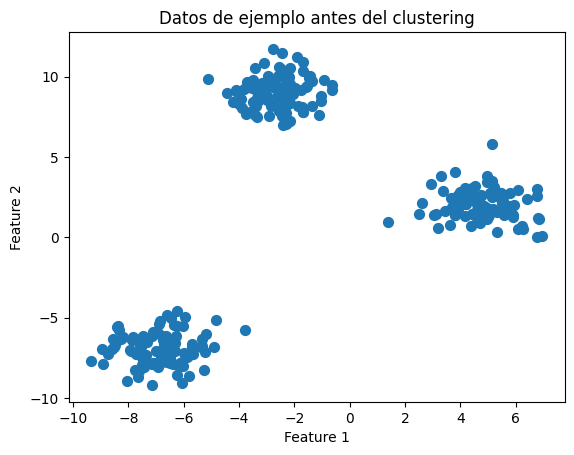

In [4]:
# Visualizar los datos antes del clustering
# s tama√±o
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos de ejemplo antes del clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [21]:
# Entrenar el modelo
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

Una vez hemos entrenado el modelo podemos obtener las etiquetas de qu√© cluster se asocia a cada punto con el atributo `labels_` del modelo. Tambi√©n podemos obtener las coordenadas de los centroides de cada cluster con el atributo `cluster_centers_` del modelo.

In [22]:
# Obtener los centros de los clusters y las etiquetas
centroids = model.cluster_centers_
labels = model.labels_

In [7]:
centroids

array([[-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [ 4.74710337,  2.01059427]])

In [23]:
labels

array([1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1], d

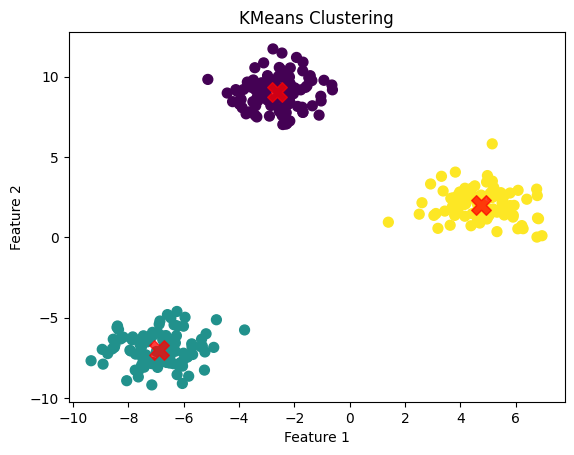

In [24]:
# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [15]:
# Realizar predicciones con datos nuevos
new_data = np.array([[2, 3], [-5, -5], [-1, 8], [-1, -2.5]])
predictions = model.predict(new_data)

predictions

array([2, 1, 0, 2], dtype=int32)

### 2.2. Jer√°rquico <a name="jerarquico"></a>

El clustering jer√°rquico (Hierarchical Clustering) es una t√©cnica de agrupamiento que busca construir una jerarqu√≠a de clusters.

A diferencia de KMeans, el clustering jer√°rquico no requiere especificar el n√∫mero de clusters de antemano. En lugar de eso, crea una estructura de √°rbol  que representa c√≥mo los puntos de datos se agrupan en diferentes niveles de similitud.

Elegiremos el K √≥ptimo utilizando un dendograma.

Hay dos tipos principales de clustering jer√°rquico:

- Aglomerativo (bottom up): comienza con cada dato en un grupo distinto (propio). Se van agrupando grupos seg√∫n sus similitudes.

- Divisivo (top down): comienza con todos los datos en un √∫nico cluster y se va dividiendo seg√∫n similitudes.

El clustering jer√°rquico es √∫til cuando no se conoce el n√∫mero √≥ptimo de cl√∫steres de antemano o cuando se desea explorar la estructura jer√°rquica de los datos. Sin embargo, puede ser computacionalmente costoso en conjuntos de datos grandes debido a la necesidad de calcular todas las distancias entre los puntos de datos.

<img src="https://drive.google.com/uc?export=view&id=1KcrQZv_E1bj0otqkKtJhYYC39W8jEy9s" height="268" width="550" style="float: center;">

### Dendograma

El resultado del clustering jer√°rquico se muestra en un dendrograma, que es un diagrama de √°rbol que muestra la jerarqu√≠a de los grupos. Los puntos de datos se encuentran en las hojas del √°rbol, y los clusters m√°s grandes se forman combinando clusters m√°s peque√±os lo largo de las ramas del √°rbol.

Los cortes horizontales en el dendrograma determinan la cantidad de cl√∫steres obtenidos al cortar el √°rbol a una cierta altura.

<img src="https://drive.google.com/uc?export=view&id=1pj_J3sb52F0rDco-FaEVAfrU0lqConJQ" height="256" width="450" style="float: center;">

### Ejemplo

In [28]:
# Generar un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples = 100, centers = 3, random_state = 42)

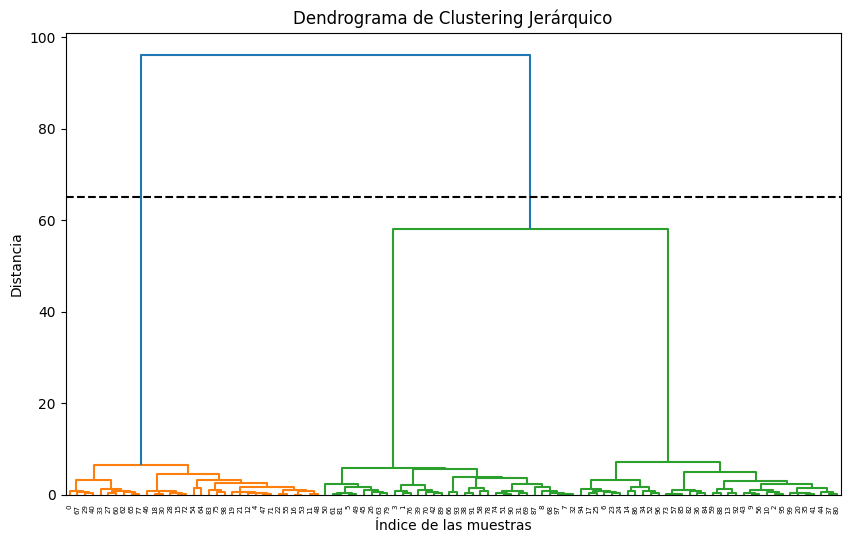

In [30]:
# Realizar el clustering jer√°rquico
Z = linkage(X, 'ward')

# Mostrar el dendrograma
plt.figure(figsize = (10, 6))

dendrogram(Z)
plt.axhline(c='k',linestyle='--', y=65)

plt.title("Dendrograma de Clustering Jer√°rquico")
plt.xlabel("√çndice de las muestras")
plt.ylabel("Distancia")
plt.show()

In [31]:
hc = AgglomerativeClustering(n_clusters = 3)

hc.fit(X)

AgglomerativeClustering(n_clusters=3)

Text(0, 0.5, 'Feature 2')

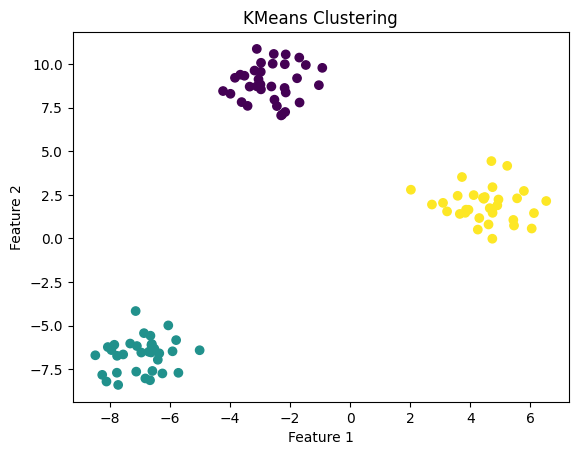

In [32]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c = hc.labels_)

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### 2.3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <a name="dbscan"></a>

Es capaz de encontrar clusters de forma arbitraria y detectar ruido (puntos que no pertenecen a ning√∫n cluster).

A diferencia de m√©todos como KMeans, DBSCAN no requiere que se especifique el n√∫mero de clusters de antemano.

Encuentra los grupos basado en la densidad de los datos.

**Ventajas**: Puede encontrar clusters de formas arbitrarias y es robusto frente al ruido.

**Desventajas**: Requiere definir los par√°metros Œµ y el n√∫mero m√≠nimo de puntos, lo que puede ser dif√≠cil.

###Terminolog√≠a

- √âpsilon (ùúñ): Es el radio de un vecindario circular alrededor de un punto de datos.

  Este par√°metro define la distancia m√°xima entre dos puntos para que uno sea considerado en el vecindario del otro.

- MinPts: Es el n√∫mero m√≠nimo de puntos que deben estar dentro del radio
ùúñ para que un punto sea considerado un punto central.

  Si un punto tiene al menos MinPts puntos en su vecindario ùúñ, se considera un punto central.

- Punto Central: Un punto que tiene al menos MinPts puntos en su vecindario
œµ.

- Punto de Borde: Un punto que no es un punto central, pero est√° dentro del vecindario œµ de un punto central.

- Punto de Ruido: Un punto que no es ni un punto central ni un punto de borde.

<img src="https://drive.google.com/uc?export=view&id=1h3Uz5C5FcrY_UPvkcVCbvSAgcFJncvSd" height="287" width="438" style="float: center;">

###Algoritmo:

1. Para cada dato cuenta cuantas instancias est√°n a una distancia Œµ (vecindario epsilon).

2. Si una instancia tiene al menos MinPts instancias en su vecindario se llama core o central. Forma un cluster.

3. Todas las instancias en el vecindario de una instancia core pertenecen al mismo cluster.

4. Cualquiera no core o fuera de vecindario es ruido.


### Ejemplo

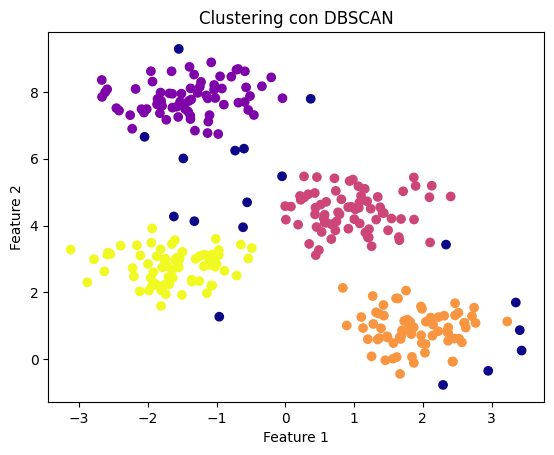

In [33]:
# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Aplicar el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("Clustering con DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 3. M√©tricas para clustering <a name="metricas"></a>

No tenemos un resultado v√°lido o real para comparar.

Se busca minimizar la distancia entre datos de un mismo grupo.  Datos similares entre s√≠.

Tambi√©n maximizar la distancia entre grupos. Clusters lo m√°s distintos posibles.

La calidad del resultado la podemos medir con la inercia.

## Inercia

Medida para conocer cu√°nta distancia hay entre los datos y el centroide de su grupo.

Si todos los datos est√°n cerca de sus centroides la inercia es baja. Indica buen agrupamieto!

Si los puntos est√°n dispersos y lejos de los centroides, dar√° una inercia alta.
Mal agrupados!


<img src="https://drive.google.com/uc?export=view&id=11tIZ-1bnF8w19xZcSMeNjp3mOiJT44IY" height="257" width="552" style="float: center;">

In [36]:
# Generar datos de ejemplo
n_samples = 300
n_features = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

# Definir el rango de valores para k
k_values = range(3, 7)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Imprimir las inercias para cada k
for k, inertia in zip(k_values, inertias):
    print(f'k = {k}, Inercia = {inertia}')

k = 3, Inercia = 566.8595511244134
k = 4, Inercia = 497.03398814952124
k = 5, Inercia = 428.21421299328415
k = 6, Inercia = 375.0659248776243


### 3.1. M√©todo del codo (elbow) <a name="elbow"></a>


El m√©todo del codo (Elbow Method) es una t√©cnica visual utilizada para determinar el n√∫mero √≥ptimo de clusters (ùëò) en un algoritmo de clustering.

La idea principal detr√°s de este m√©todo es encontrar el punto donde agregar m√°s clusters no proporciona una mejora significativa en la compactaci√≥n de los clusters, medido por la inercia.

Se grafica la inercia para un rango de K grupos.

Se busca el ‚Äúcodo‚Äù en el gr√°fico resultante.
  - Observa la gr√°fica para identificar el punto donde la tasa de disminuci√≥n de la inercia se vuelve m√°s lenta.
  - Se produce el √∫ltimo decrecimiento importante.
  - El "codo" en la curva es el punto donde agregar m√°s clusters ya no resulta en una disminuci√≥n significativa de la inercia. Este punto sugiere el n√∫mero √≥ptimo de clusters.

<img src="https://drive.google.com/uc?export=view&id=1OajkMba49ZMlYnSC80nAtMz_rIxrMdDx" height="313" width="459" style="float: center;">

k = 2, Inercia = 5763.4647894614345
k = 3, Inercia = 566.8595511244134
k = 4, Inercia = 497.03398814952124
k = 5, Inercia = 428.21421299328415
k = 6, Inercia = 375.0659248776243
k = 7, Inercia = 308.19836610418264
k = 8, Inercia = 272.405731498748
k = 9, Inercia = 234.28072349591122
k = 10, Inercia = 219.0405333899987


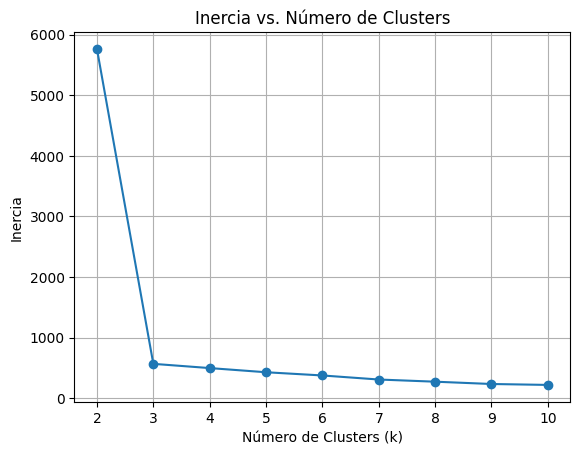

In [37]:
# Generar datos de ejemplo
n_samples = 300
n_features = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

# Definir el rango de valores para k
k_values = range(2, 11)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Imprimir las inercias para cada k
for k, inertia in zip(k_values, inertias):
    print(f'k = {k}, Inercia = {inertia}')

# Graficar la inercia en funci√≥n de k
plt.plot(k_values, inertias, marker='o')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Inercia vs. N√∫mero de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()


  ### 3.2. Indice silueta (silhouette) <a name="silhouette"></a>

El √≠ndice de silueta (Silhouette Index) es una medida utilizada para evaluar la calidad de los clusters creados por un algoritmo de clustering.

Este √≠ndice proporciona una forma de cuantificar cu√°n bien se agrupan los puntos de datos dentro de sus clusters y cu√°n distintos son los clusters entre s√≠.

El valor de la silueta para un punto de datos ùëñ se define como:

<img src="https://drive.google.com/uc?export=view&id=1TLjLIl4hiVliJU1HSr0zGYHfs55eXRQR" height="81" width="245" style="float: center;">

donde

  a(x)= distancia promedio de x a todos los dem√°s puntos en el mismo cluster.

  b(x)= distancia promedio de x a todos los dem√°s puntos en el cluster m√°s cercano al que no pertenece x.

El valor de ùë†(ùëñ) oscila entre -1 y 1:
- ùë†(ùëñ) cercano a 1 indica que el punto est√° bien agrupado.
- ùë†(ùëñ) cercano a 0 indica que el punto est√° en el l√≠mite entre dos clusters.
- ùë†(ùëñ) cercano a -1 indica que el punto probablemente est√° mal asignado a su cluster.

<img src="https://drive.google.com/uc?export=view&id=1Xb1nvxj0pmWZEkIQAb6VC-64vJi3gn5T" height="84" width="160" style="float: center;">

k = 2, Inercia = 5763.4647894614345, √çndice de Silueta = 0.7049437310743717
k = 3, Inercia = 566.8595511244134, √çndice de Silueta = 0.8480303059596955
k = 4, Inercia = 497.03398814952124, √çndice de Silueta = 0.6764211610337508
k = 5, Inercia = 428.21421299328415, √çndice de Silueta = 0.49631564306271647
k = 6, Inercia = 375.0659248776243, √çndice de Silueta = 0.5170399982662364
k = 7, Inercia = 308.19836610418264, √çndice de Silueta = 0.358030586983425
k = 8, Inercia = 272.405731498748, √çndice de Silueta = 0.3625632360122803
k = 9, Inercia = 234.28072349591122, √çndice de Silueta = 0.37134027555333055
k = 10, Inercia = 219.0405333899987, √çndice de Silueta = 0.3638824656870273


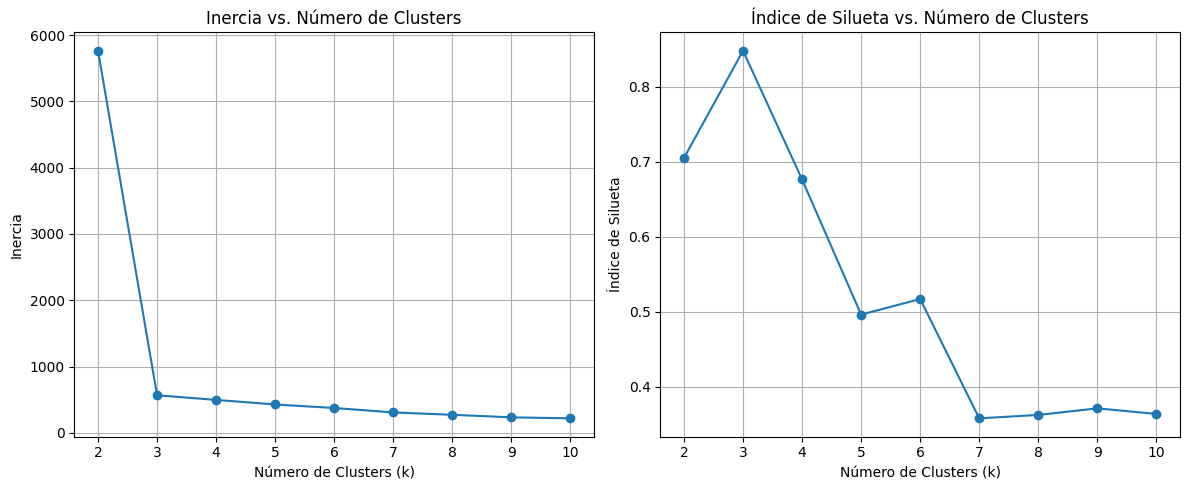

In [38]:
# Generar datos de ejemplo
n_samples = 300
n_features = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

# Definir el rango de valores para k
k_values = range(2, 11)
inertias = []
silhouette_scores = []

# Calcular la inercia y el √≠ndice de silueta para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Imprimir las inercias y los √≠ndices de silueta para cada k
for k, inertia, silhouette in zip(k_values, inertias, silhouette_scores):
    print(f'k = {k}, Inercia = {inertia}, √çndice de Silueta = {silhouette}')

# Graficar la inercia en funci√≥n de k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Inercia vs. N√∫mero de Clusters')
plt.xticks(k_values)
plt.grid(True)

# Graficar el √≠ndice de silueta en funci√≥n de k
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('√çndice de Silueta')
plt.title('√çndice de Silueta vs. N√∫mero de Clusters')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


## 4. Reducci√≥n de dimensionalidad <a name="dimensionalidad"></a>

La reducci√≥n de dimensionalidad (dimensionality reduction) es una t√©cnica utilizada para disminuir la cantidad de caracter√≠sticas o variables en un conjunto de datos.

El objetivo principal de este modelo es simplificar la representaci√≥n de los datos, manteniendo al mismo tiempo la mayor cantidad posible de informaci√≥n relevante.

Existen muchos motivos por los cuales querr√≠amos utilizar este tipo de modelos para simplificar los datos. Podemos destacar:

- Simplificaci√≥n y visualizaci√≥n de datos: En conjuntos de datos con muchas caracter√≠sticas, la reducci√≥n de dimensionalidad permite simplificar la representaci√≥n de los datos y visualizarlos en espacios de menor dimensi√≥n.

- Reducci√≥n de ruido: Al reducir la dimensionalidad, se puede eliminar informaci√≥n redundante o ruidosa, lo que puede mejorar la calidad de los datos y el rendimiento de los modelos de aprendizaje autom√°tico.

- Eficiencia computacional: Conjuntos de datos con muchas caracter√≠sticas pueden requerir una mayor capacidad de c√≥mputo y memoria. La reducci√≥n de dimensionalidad puede ayudar a reducir esta complejidad, lo que resulta en tiempos de entrenamiento y predicci√≥n m√°s r√°pidos.

- Regularizaci√≥n: En algunos casos, la reducci√≥n de dimensionalidad act√∫a como una forma de regularizaci√≥n, evitando el sobreajuste (overfitting) al disminuir la complejidad del modelo.

## 4.1. An√°lisis de Componentes Principales <a name="pca"></a>


PCA es un m√©todo lineal que transforma los datos a un nuevo espacio de menor dimensi√≥n utilizando componentes principales que capturan la mayor variabilidad de los datos.

Imaginemos que tenemos un conjunto de datos con muchas caracter√≠sticas, como la altura, el peso, la edad, los ingresos y el nivel educativo de diferentes personas.

Cada persona representa un punto en un espacio de alta dimensi√≥n, donde cada caracter√≠stica es una dimensi√≥n.

El PCA nos permite encontrar nuevas direcciones o ejes en este espacio de alta dimensi√≥n, conocidos como componentes principales.

Estas direcciones representan las combinaciones lineales de las caracter√≠sticas originales que explican la mayor parte de la variabilidad de los datos.

El primer componente principal captura la mayor variabilidad posible en el conjunto de datos, el segundo componente principal captura la siguiente mayor variabilidad, y as√≠ sucesivamente.

Al utilizar el PCA, podemos elegir cu√°ntos componentes principales deseamos mantener o que porcentaje de variabilidad preservar.

####Ejemplo 1: indicando cantidad de componentes

In [39]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un objeto PCA y ajustarlo a los datos
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [40]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

####Ejemplo 2: indicando porcentaje de variabilidad

In [47]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un objeto PCA y ajustarlo a los datos
percentage_variability = 0.98
pca = PCA(n_components = percentage_variability)
X_pca = pca.fit_transform(X)

In [48]:
X_pca

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

#### ¬øCu√°nto aporta cada componente? ¬øPor qu√© se quedo con 2?

In [44]:
# Crear un objeto PCA sin especificar el n√∫mero de componentes
pca = PCA()

# Ajustar PCA a los datos
pca.fit(X)

# Obtener la proporci√≥n de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada explicada por los componentes
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [45]:
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [46]:
cumulative_variance_ratio

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

## 5. Links de inter√©s <a name="links"></a>

- [Clustering in Machine Learning](https://www.geeksforgeeks.org/clustering-in-machine-learning/)
- [Machine Learning & Clustering: el algoritmo DBSCAN](https://datascientest.com/es/machine-learning-clustering-dbscan)
- [Comprende Principal Component Analysis](https://www.aprendemachinelearning.com/comprende-principal-component-analysis/)